<a href="https://colab.research.google.com/github/Safeerkn/nlp-with-disaster-tweets/blob/main/nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   date      4058 non-null   object
 5   target    7613 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 357.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
 4   date      1683 non-null   object
dtypes: int64(1), object(4)
memory usage: 127.6+ KB
None


In [5]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
df_train.head()

,id,keyword,location,text,date,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,2015-08-10 13:08:09+00:00,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,2018-03-13 08:07:14+00:00,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,2015-08-06 23:49:46+00:00,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",2015-08-04 08:05:22+00:00,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,2015-08-08 04:32:30+00:00,1


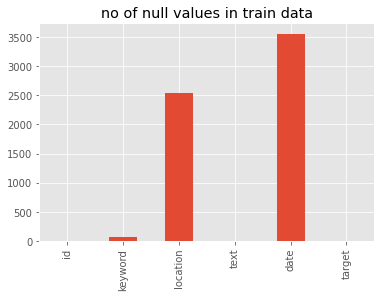

In [7]:
df_train.isna().sum().plot(kind="bar")
plt.title("no of null values in train data")
plt.show()

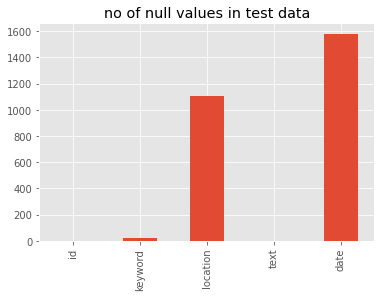

In [8]:
df_test.isna().sum().plot(kind="bar")
plt.title("no of null values in test data")
plt.show()

In [9]:
# finding percentage of 0 and 1 target

real_tweets = len(df_train[df_train["target"] == 1])
real_tweets_percentage = real_tweets/df_train.shape[0]*100
fake_tweets_percentage = 100-real_tweets_percentage

#print

print("Real tweets percentage: ",real_tweets_percentage)
print("Fake tweets percentage: ",fake_tweets_percentage)

Real tweets percentage:  42.96597924602653
Fake tweets percentage:  57.03402075397347


In [10]:
## exploring the data

In [11]:
STOPWORDS = stopwords.words('english')
STOPWORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
import string
import warnings
warnings.filterwarnings("ignore") 

In [13]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

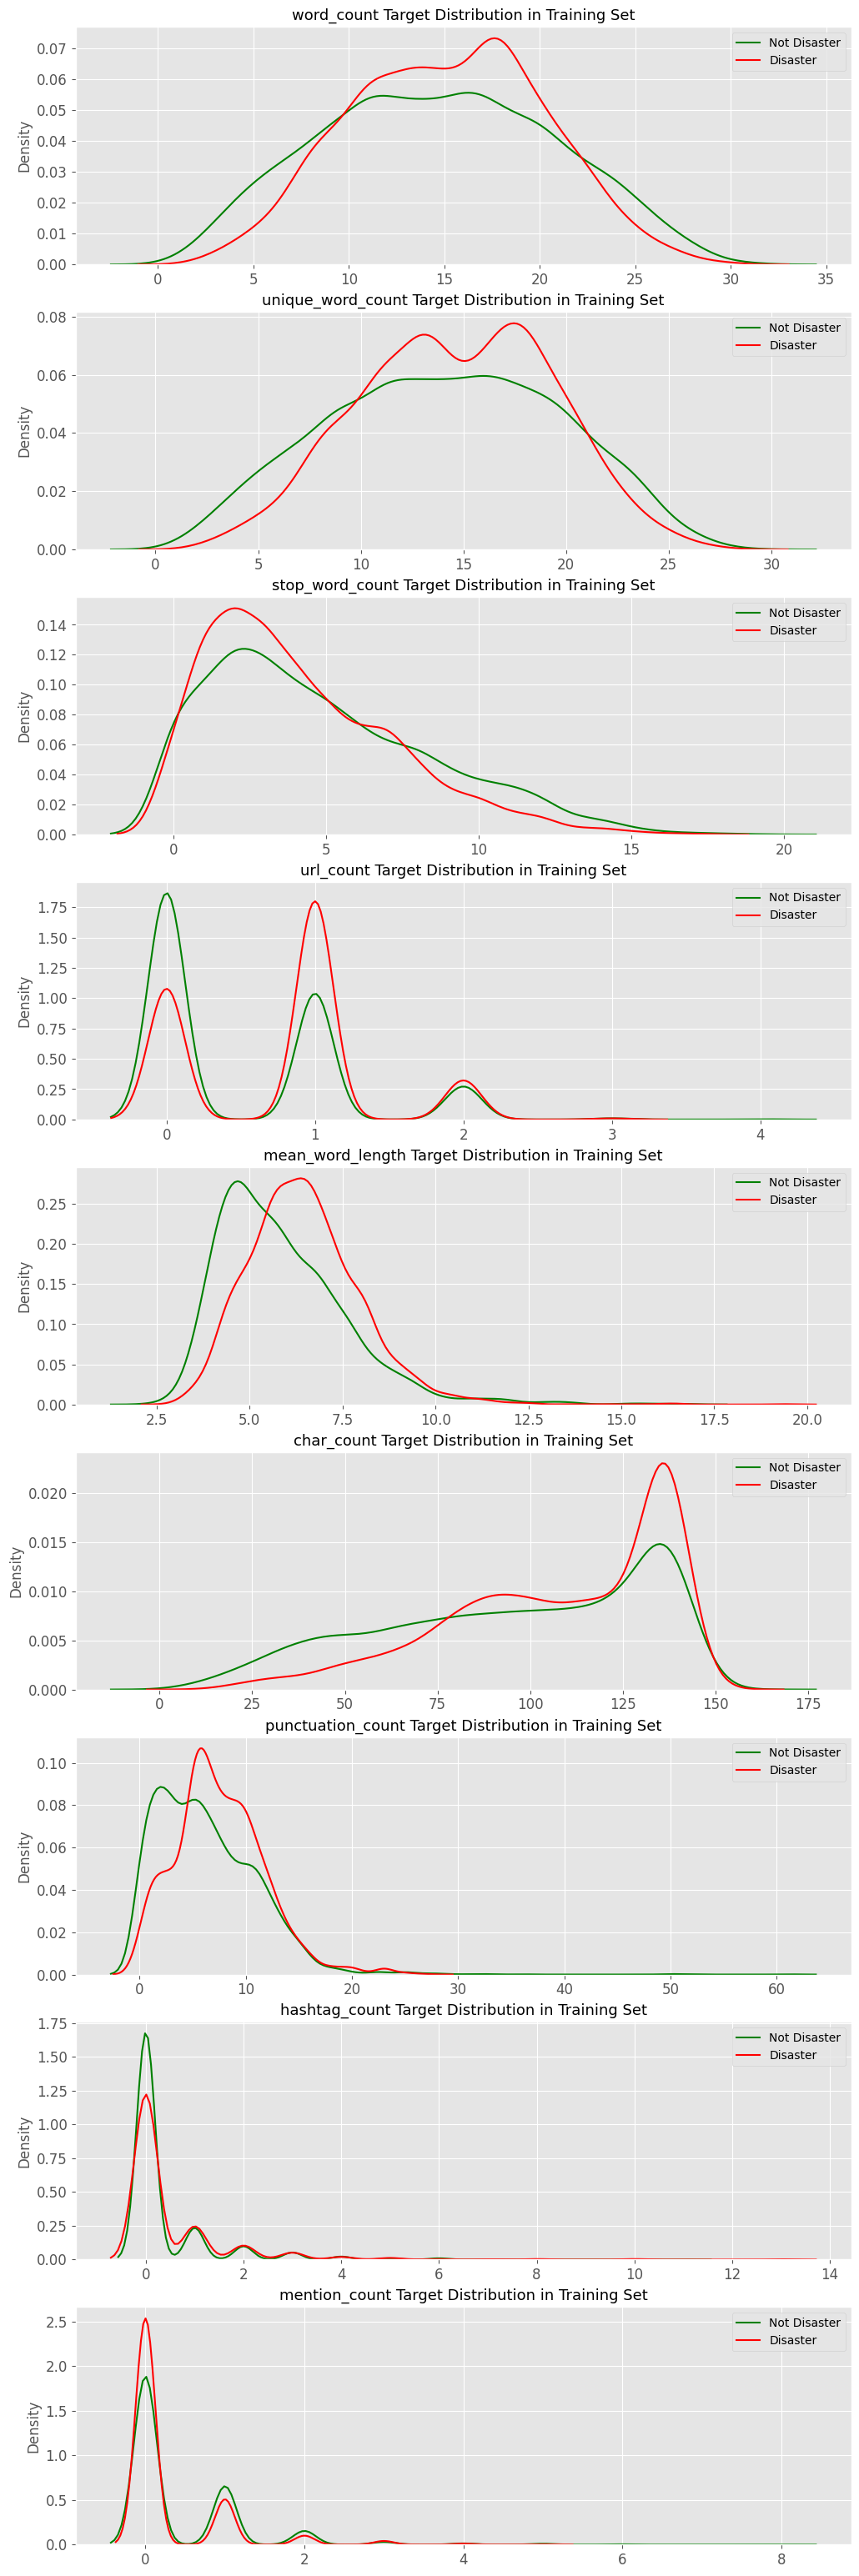

In [14]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = df_train['target'] == 1


fig, axes = plt.subplots(ncols=1, nrows=len(METAFEATURES), figsize=(12, 40),dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.kdeplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i], color='green')
    sns.kdeplot(df_train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i], color='red')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend()
    axes[i].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    
plt.show()

Text(0, 0.5, 'samples')

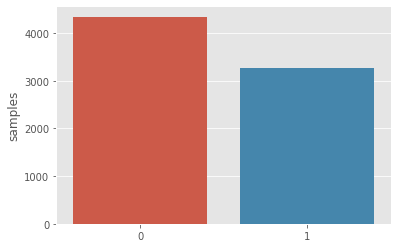

In [15]:
x=df_train.target.value_counts()
sns.barplot(x=x.index,y=x)
plt.gca().set_ylabel('samples')

In [16]:
df_train["text"].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [17]:
df_train["text"].tolist()[:5]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']

In [18]:
t = df_train["text"].to_list()
for i in range(5):
    print('Tweet Number '+str(i+1)+': '+t[i])

Tweet Number 1: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Tweet Number 2: Forest fire near La Ronge Sask. Canada
Tweet Number 3: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Tweet Number 4: 13,000 people receive #wildfires evacuation orders in California 
Tweet Number 5: Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


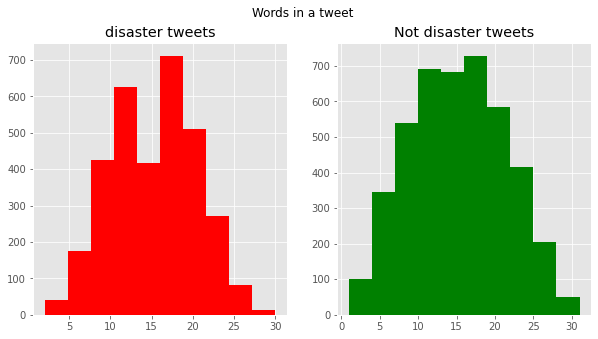

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [19]:
##number of words in tweet


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df_train_len=df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(df_train_len,color='red')
ax1.set_title('disaster tweets')
df_train_len=df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(df_train_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()
plt.legend

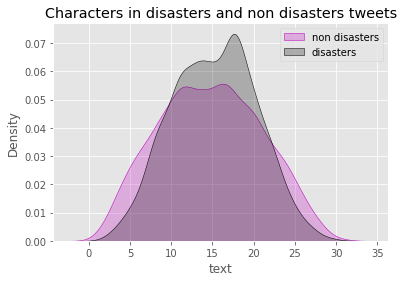

In [20]:
plot1 = sns.kdeplot(df_train[df_train['target'] == 0]['text'].str.split().map(lambda x: len(x)), shade = True, color = 'm').set(title='Characters in disasters and non disasters tweets')
plot2 = sns.kdeplot(df_train[df_train['target']== 1]['text'].str.split().map(lambda x: len(x)), shade = True, color = 'k')
label=['non disasters','disasters']
plt.legend(labels=label);
#plt.show()

In [21]:
#consider locations

l = df_train["location"].to_list()
print('There is '+ str(len(set(l)))+" different loction")

There is 3342 different loction


In [22]:
df_train['location'].value_counts().head(n=20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
New York, NY        15
California, USA     15
Florida             14
Name: location, dtype: int64

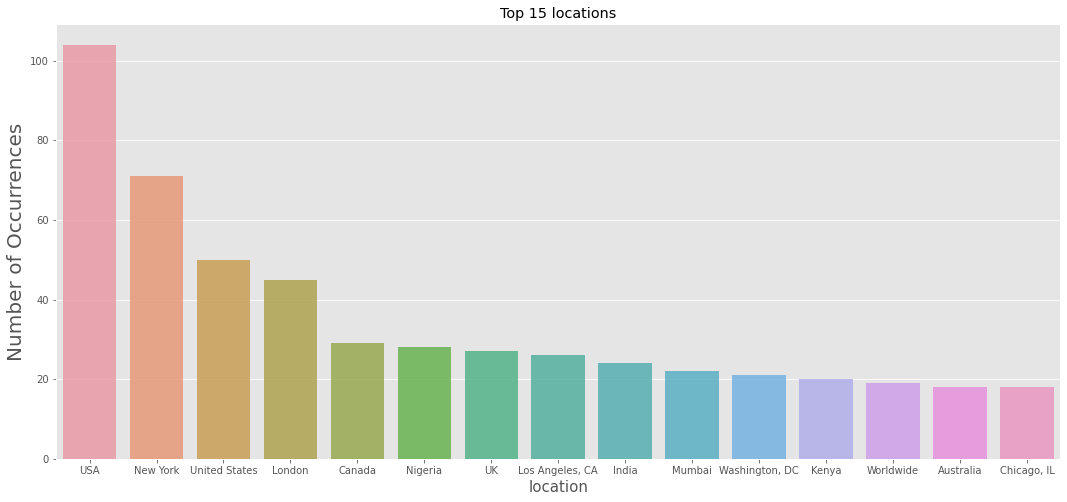

In [23]:
location_count  = df_train['location'].value_counts()
location_count = location_count[:15,]
plt.figure(figsize=(18,8))
sns.barplot(x=location_count.index, y=location_count.values, alpha=0.8)
plt.title('Top 15 locations')
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('location', fontsize=15)
plt.show()

As location is free text, the data is not clean, you can see both 'USA' and 'United States' in top locations. We than have a look at % of disaster tweets for common locations.

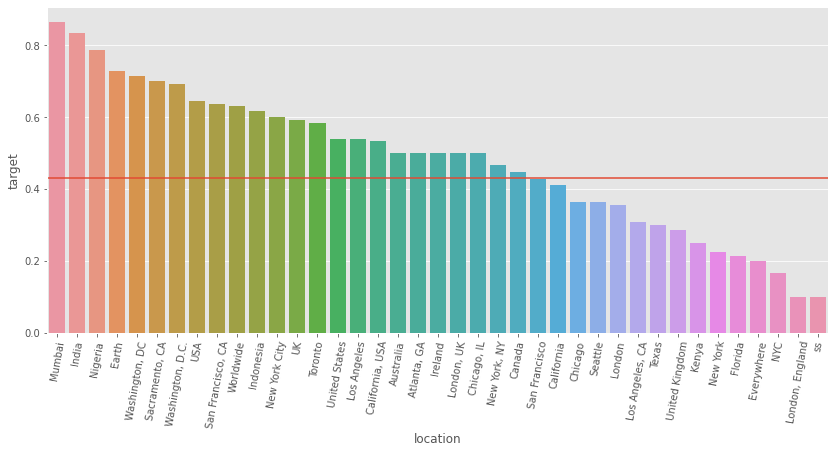

In [24]:
raw_loc = df_train.location.value_counts()
top_loc = list(raw_loc[raw_loc>=10].index)
top_only = df_train[df_train.location.isin(top_loc)]

top_l = top_only.groupby('location').mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l.index, y=top_l)
plt.axhline(np.mean(df_train.target))
plt.xticks(rotation=80)
plt.show()

The top 3 locations with highest % of disaster tweets are Mumbai, Inida, and Nigeria. As the location data is not clean, we see some interesting cases, such as 'London, UK' saw a higher-than-average % of disaster tweets, but 'London' is below average. We try to clean up the location and see if there is any difference:

In [25]:
# Fill NA values
for col in ['keyword','location']:
    df_train[col] = df_train[col].fillna('None')
    df_test[col] = df_test[col].fillna('None')

def clean_loc(x):
    if x == 'None':
        return 'None'
    elif x == 'Earth' or x =='Worldwide' or x == 'Everywhere':
        return 'World'
    elif 'New York' in x or 'NYC' in x:
        return 'New York'    
    elif 'London' in x:
        return 'London'
    elif 'Mumbai' in x:
        return 'Mumbai'
    elif 'Washington' in x and 'D' in x and 'C' in x:
        return 'Washington DC'
    elif 'San Francisco' in x:
        return 'San Francisco'
    elif 'Los Angeles' in x:
        return 'Los Angeles'
    elif 'Seattle' in x:
        return 'Seattle'
    elif 'Chicago' in x:
        return 'Chicago'
    elif 'Toronto' in x:
        return 'Toronto'
    elif 'Sacramento' in x:
        return 'Sacramento'
    elif 'Atlanta' in x:
        return 'Atlanta'
    elif 'California' in x:
        return 'California'
    elif 'Florida' in x:
        return 'Florida'
    elif 'Texas' in x:
        return 'Texas'
    elif 'United States' in x or 'USA' in x:
        return 'USA'
    elif 'United Kingdom' in x or 'UK' in x or 'Britain' in x:
        return 'UK'
    elif 'Canada' in x:
        return 'Canada'
    elif 'India' in x:
        return 'India'
    elif 'Kenya' in x:
        return 'Kenya'
    elif 'Nigeria' in x:
        return 'Nigeria'
    elif 'Australia' in x:
        return 'Australia'
    elif 'Indonesia' in x:
        return 'Indonesia'
    elif x in top_loc:
        return x
    else: return 'Others'
    
df_train['location_clean'] = df_train['location'].apply(lambda x: clean_loc(str(x)))
df_test['location_clean'] = df_test['location'].apply(lambda x: clean_loc(str(x)))

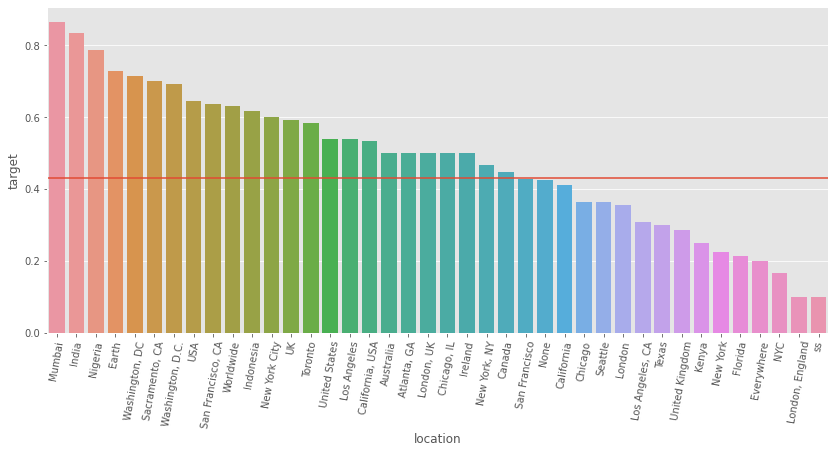

In [26]:
raw_loc = df_train.location.value_counts()
top_loc = list(raw_loc[raw_loc>=10].index)
top_only = df_train[df_train.location.isin(top_loc)]

top_l = top_only.groupby('location').mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l.index, y=top_l)
plt.axhline(np.mean(df_train.target))
plt.xticks(rotation=80)
plt.show()

In [27]:
  #consider dates

l = df_train["date"].to_list()
print('There is '+ str(len(set(l)))+" different dates")

There is 3796 different dates


In [28]:
df_train['date'].value_counts().head(n=20)

2020-08-25 10:07:15+00:00    12
2015-08-06 00:17:15+00:00    10
2020-08-01 02:00:00+00:00     7
2015-11-21 12:15:38+00:00     6
2015-11-21 03:39:03+00:00     6
2015-08-05 21:17:09+00:00     5
2015-08-06 01:55:02+00:00     4
2015-08-05 23:11:02+00:00     4
2020-08-27 22:00:23+00:00     4
2015-08-05 21:16:58+00:00     3
2015-08-05 20:55:02+00:00     3
2015-11-21 10:12:02+00:00     3
2015-08-06 01:20:44+00:00     3
2017-03-10 21:47:01+00:00     3
2015-08-06 00:38:38+00:00     3
2017-09-23 15:48:46+00:00     3
2016-03-29 19:20:25+00:00     3
2015-08-06 12:28:08+00:00     3
2020-08-25 10:01:33+00:00     3
2015-11-21 06:57:15+00:00     3
Name: date, dtype: int64

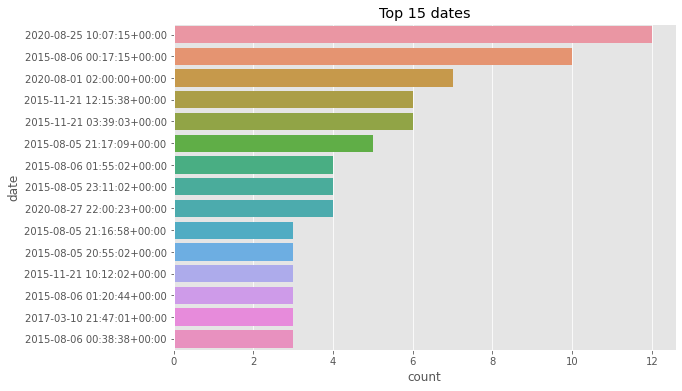

In [29]:
plt.figure(figsize=(9,6))
sns.countplot(y=df_train.date, order = df_train.date.value_counts().iloc[:15].index)
plt.title('Top 15 dates')
plt.show()

### keywords

df_train['keyword'].value_counts().head(n=20)

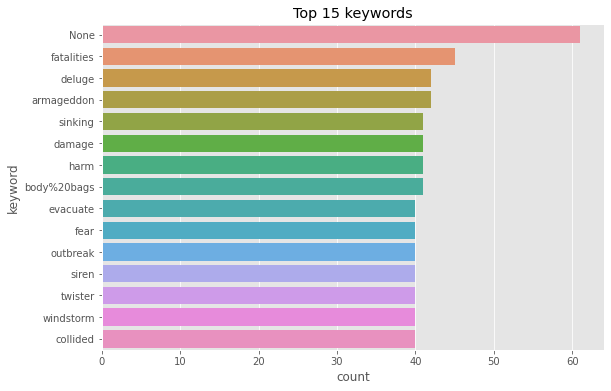

In [30]:
plt.figure(figsize=(9,6))
sns.countplot(y=df_train.keyword, order = df_train.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()


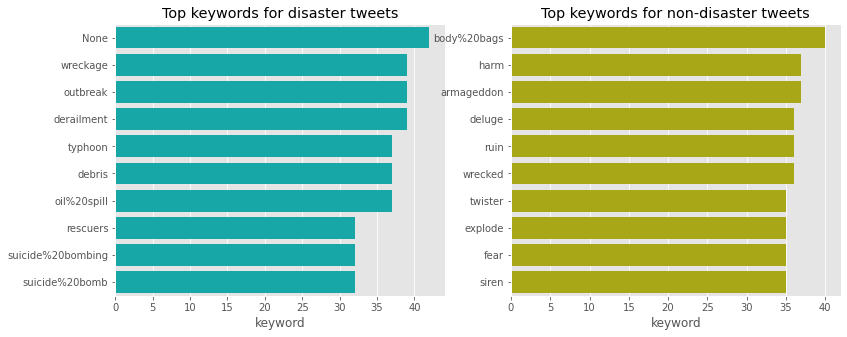

In [31]:
kw_d = df_train[df_train.target==1].keyword.value_counts().head(10)
kw_nd = df_train[df_train.target==0].keyword.value_counts().head(10)

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.barplot(kw_d, kw_d.index, color='c')
plt.title('Top keywords for disaster tweets')
plt.subplot(122)
sns.barplot(kw_nd, kw_nd.index, color='y')
plt.title('Top keywords for non-disaster tweets')
plt.show()


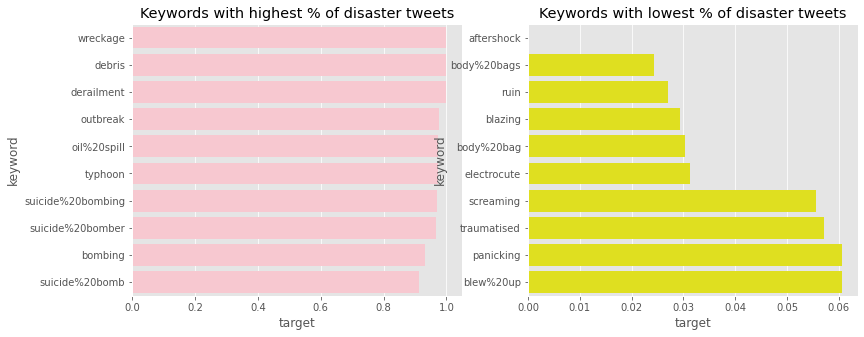

In [32]:
top_d = df_train.groupby('keyword').mean()['target'].sort_values(ascending=False).head(10)
top_nd = df_train.groupby('keyword').mean()['target'].sort_values().head(10)

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.barplot(top_d, top_d.index, color='pink')
plt.title('Keywords with highest % of disaster tweets')
plt.subplot(122)
sns.barplot(top_nd, top_nd.index, color='yellow')
plt.title('Keywords with lowest % of disaster tweets')
plt.show()

In [33]:
#cleaning data

import string
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and train datasets
df_train['text'] = df_train['text'].apply(lambda x: clean(x))
df_test['text'] = df_test['text'].apply(lambda x: clean(x))


df_train['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [34]:
pip install textacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.4/208.4 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=77910 sha256=9bebf1dc545ab29601ab521dca44592887fc12acf2576b3383f7168351f93411
  Stored in directory: /root/.cache/pip/wheels/f1/c7/3c/4c83132de76359e3a429fd09c08995945ca96c5290a41651d3
Successfully built jellyfish


In [35]:
from textacy import preprocessing
from functools import partial

# create cleaning pipeline
preproc = preprocessing.make_pipeline(
    
    
    preprocessing.normalize.hyphenated_words,
    preprocessing.normalize.unicode,
    preprocessing.remove.accents, 
    partial(preprocessing.replace.emails, repl= ""),
    partial(preprocessing.replace.phone_numbers, repl=""),
    partial(preprocessing.replace.urls, repl= ""), 
    partial(preprocessing.replace.user_handles, repl=""),
    partial(preprocessing.replace.numbers, repl=""),
    preprocessing.remove.html_tags,
    preprocessing.remove.brackets,
    partial(preprocessing.remove.punctuation, only=[ ",", ":", ";", "/", " ","(","@"]),
    
    preprocessing.replace.currency_symbols,
    
    preprocessing.replace.emojis,
    
 )

In [36]:
df_train['text_c'] = df_train['text'].apply(clean)
df_train["clean_text"] = df_train["text_c"].apply(preproc)
df_train.sample(5, random_state=42)

,id,keyword,location,text,date,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count,location_clean,text_c,clean_text
2644,3796,destruction,None,so you have a new weapon that can cause unimag...,2015-08-06 17:55:50+00:00,1,11,11,6,0,5.090909,66,2,0,0,None,so you have a new weapon that can cause unimag...,so you have a new weapon that can cause unimag...
2227,3185,deluge,None,the famping things i do for gishwhes just got ...,NaN,0,21,20,9,0,4.714286,119,10,1,4,None,the famping things i do for gishwhes just got ...,the famping things i do for gishwhes just got ...
5448,7769,police,UK,dt georgegalloway rt ûïthe col police can ca...,NaN,1,15,15,3,1,7.400000,125,12,0,2,UK,dt georgegalloway rt ûïthe col police can ca...,dt georgegalloway rt uithe col police can cat...
132,191,aftershock,None,aftershock back to school kick off was great i...,2015-08-06 02:48:03+00:00,0,21,20,9,0,4.476190,114,3,0,0,None,aftershock back to school kick off was great i...,aftershock back to school kick off was great i...
6845,9810,trauma,"Montgomery County, MD",in response to trauma children of addicts deve...,2015-08-06 01:09:42+00:00,0,17,17,5,0,5.235294,105,3,0,0,Others,in response to trauma children of addicts deve...,in response to trauma children of addicts deve...


In [37]:
#test train split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['clean_text'],
                                                    df_train['target'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df_train['target'])

print('Size of Training Data ', x_train.shape[0])
print('Size of Test Data ', x_test.shape[0])


Size of Training Data  6090
Size of Test Data  1523


In [38]:
##modelling
## Classification with TFIDF and SVM

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC


In [39]:


text=df_train['text']
y=df_train['target']



In [40]:
tfidf= TfidfVectorizer()
X=tfidf.fit_transform(text)

In [41]:
X.shape

(7613, 16543)

In [42]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [43]:
def run_SVM (clf, x_train, x_test, y_train, y_test):
    clf.fit (x_train, y_train)
    y_pred=clf.predict (x_test)
    print()
    print('Classification Report')
    print(classification_report (y_test, y_pred))

In [44]:
from sklearn.svm import LinearSVC

In [45]:
clf= LinearSVC()
run_SVM(clf, x_train, x_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.68      0.75       654

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



# word embedding and classification with deep learning

In [46]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [48]:
token = Tokenizer()
token.fit_on_texts (text)
vocab_size = len (token.word_index) + 1
vocab_size


16834

In [49]:
print (token.word_index)

{'the': 1, 'a': 2, 'in': 3, 'to': 4, 'of': 5, 'and': 6, 'i': 7, 'is': 8, 'for': 9, 'on': 10, 'you': 11, 'my': 12, 'with': 13, 'it': 14, 'that': 15, 'at': 16, 'by': 17, 'this': 18, 'from': 19, 'are': 20, 'be': 21, 'was': 22, 'have': 23, 'like': 24, 'as': 25, 'up': 26, 'just': 27, 'so': 28, 'me': 29, 'but': 30, 'amp': 31, 'im': 32, 'not': 33, 'your': 34, 'out': 35, 'its': 36, 'after': 37, 'will': 38, 'all': 39, 'no': 40, 'an': 41, 'fire': 42, 'has': 43, 'when': 44, 'if': 45, 'we': 46, 'get': 47, 'new': 48, 'via': 49, 'now': 50, 'more': 51, 'about': 52, 'or': 53, 'what': 54, 'people': 55, 'he': 56, 'they': 57, 'been': 58, 'one': 59, 'how': 60, 'dont': 61, 'over': 62, 'news': 63, 'who': 64, 'into': 65, 'do': 66, 'were': 67, 'us': 68, 'video': 69, 'can': 70, 'emergency': 71, 'disaster': 72, 'there': 73, 'than': 74, 'police': 75, 'her': 76, 'would': 77, 'some': 78, 'still': 79, 'his': 80, 'body': 81, 'burning': 82, 'back': 83, 'california': 84, 'crash': 85, 'suicide': 86, 'storm': 87, 'why':

In [50]:
encoded_text= token.texts_to_sequences (text)

In [51]:
print (encoded_text)

[[107, 4290, 20, 1, 834, 5, 18, 231, 123, 1629, 4291, 68, 39], [174, 42, 208, 684, 6419, 6420, 1300], [39, 1630, 1506, 4, 1999, 3, 633, 20, 118, 6421, 17, 1631, 40, 414, 237, 53, 1999, 3, 633, 1301, 20, 1022], [55, 4292, 1302, 237, 1301, 3, 84], [27, 90, 1132, 18, 321, 19, 6422, 2000, 25, 246, 19, 1302, 6423, 65, 2, 175], [2708, 442, 84, 1507, 793, 3, 614, 6424, 538, 4, 1080, 351, 42, 4293, 1302], [209, 72, 794, 271, 1133, 795, 232, 5, 1632, 3, 6425, 961, 2273, 1508], [32, 10, 213, 5, 1, 1803, 6, 7, 70, 104, 2, 42, 3, 1, 4294], [266, 41, 71, 237, 1209, 50, 3, 1, 564, 796, 1, 685], [32, 2274, 15, 1, 510, 8, 223, 4, 107, 352], [565, 55, 584, 19, 1, 272, 443, 28, 585], [797, 615, 2709, 8, 200, 2710, 3320, 634, 2, 635, 7, 189, 3, 615, 2709, 54, 152, 7, 284, 66, 54, 152, 7, 284, 66, 6426, 232], [2711, 232, 2001, 6427, 2709, 53, 586, 285, 709, 3321], [209, 3, 4295, 878, 46, 1633, 4295], [224, 4, 175, 371, 10, 3, 4296, 119, 85, 339], [616, 26, 95], [7, 108, 4297], [296, 8, 1634], [12, 119, 8,

In [52]:
max_length = 40
X = pad_sequences (encoded_text, maxlen=max_length, padding='post')

In [53]:
print(X)

[[ 107 4290   20 ...    0    0    0]
 [ 174   42  208 ...    0    0    0]
 [  39 1630 1506 ...    0    0    0]
 ...
 [ 210    5  558 ...    0    0    0]
 [  75 1064   37 ...    0    0    0]
 [   1  193   51 ...    0    0    0]]


In [54]:
X.shape

(7613, 40)

# BERT MODEL BUILDING AND TRAINING

In [55]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 73.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 113.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [56]:
from ktrain import text
import ktrain

In [57]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(train_df=df_train, text_column='text', label_columns=['target'], maxlen=40, preprocess_mode='bert')

['not_target', 'target']
      not_target  target
5415         1.0     0.0
1136         0.0     1.0
4834         0.0     1.0
755          1.0     0.0
3518         1.0     0.0
['not_target', 'target']
      not_target  target
4042         0.0     1.0
1799         1.0     0.0
4508         0.0     1.0
4571         1.0     0.0
2896         1.0     0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [58]:
model = text.text_classifier (name='bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 40
done.


In [59]:
learner = ktrain.get_learner(model=model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=64)

In [60]:
learner.fit_onecycle(lr= 2e-4, epochs=3)



begin training using onecycle policy with max lr of 0.0002...
Epoch 1/3
108/108 [==============================] - 105s 571ms/step - loss: 0.4683 - accuracy: 0.7873 - val_loss: 0.3978 - val_accuracy: 0.8346
Epoch 2/3
108/108 [==============================] - 57s 531ms/step - loss: 0.3654 - accuracy: 0.8508 - val_loss: 0.4588 - val_accuracy: 0.8386
Epoch 3/3
108/108 [==============================] - 57s 532ms/step - loss: 0.2232 - accuracy: 0.9178 - val_loss: 0.4390 - val_accuracy: 0.8425


In [61]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [76]:
data = ['i met you today by accident', 'i got today car accident','iam injured']

In [77]:
predictor.predict(data, return_proba=True)

1/1 [==============================] - 0s 47ms/step


array([[0.9855746 , 0.0144254 ],
       [0.7157999 , 0.28420004],
       [0.10060029, 0.89939976]], dtype=float32)

In [78]:
predictor.predict(data[1])

1/1 [==============================] - 0s 41ms/step


'not_target'

In [79]:
classes = predictor.get_classes()

In [80]:
data

['i met you today by accident', 'i got today car accident', 'iam injured']

In [81]:
y_pred = predictor.predict(data[1])
classes.index(y_pred)

1/1 [==============================] - 0s 34ms/step


0

In [82]:
predictor.get_classes()

['not_target', 'target']

In [83]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [70]:
data = [' Hey iam here']

In [71]:
predictor.predict(data, return_proba=True)

1/1 [==============================] - 0s 43ms/step


array([[0.9778846 , 0.02211538]], dtype=float32)

In [72]:
data

[' Hey iam here']

In [73]:
predictor.predict(data)

1/1 [==============================] - 0s 42ms/step


['not_target']

In [87]:
data = ['i met you today by accident', 'i got today car accident,iam injured']

In [88]:
predictor.predict(data)

1/1 [==============================] - 0s 35ms/step


['not_target', 'target']